### Import Libraries

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

: 

### Load the Dataset

In [2]:
df = pd.read_csv("data/MNISTonly0_1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Visualize each Digits

In [3]:
pixel_colnames = df.columns[:-1]

In [4]:
image_values = df.loc[0, pixel_colnames].values

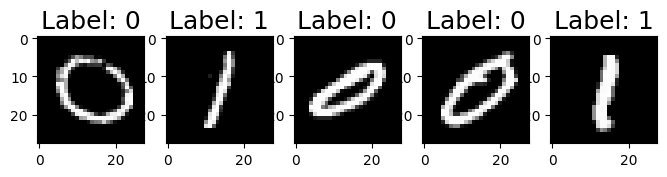

In [5]:
plt.figure(figsize=(8,4))
for index in range(0, 5):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(28,28), cmap ='gray')
    plt.title('Label: ' + str(image_label), fontsize = 18)

### Splitting Data Into Training and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=0)

### Standardize the Data

In [7]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Variable created for demonstational purposes in the notebook
scaledTrainImages = X_train.copy()

### PCA Then Logistic Regression

In [9]:
"""
n_components = .90 means that scikit-learn will choose the minimum number 
of principal components such that 90% of the variance is retained.
"""

pca = PCA(n_components = .90)

# Fit PCA on training set only
pca.fit(X_train)

# Apply the mapping (transform) to both the training set and the test set. 
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

print('Number of dimensions before PCA: ' + str(len(pixel_colnames)))
print('Number of dimensions after PCA: ' + str(pca.n_components_))
print('Classification accuracy: ' + str(clf.score(X_test, y_test)))

Number of dimensions before PCA: 784
Number of dimensions after PCA: 104
Classification accuracy: 0.996


## Relationship between Cumulative Explained Variance and Number of Principal Components
The following code aims to show the level of redundancy present in multiple dimensions.

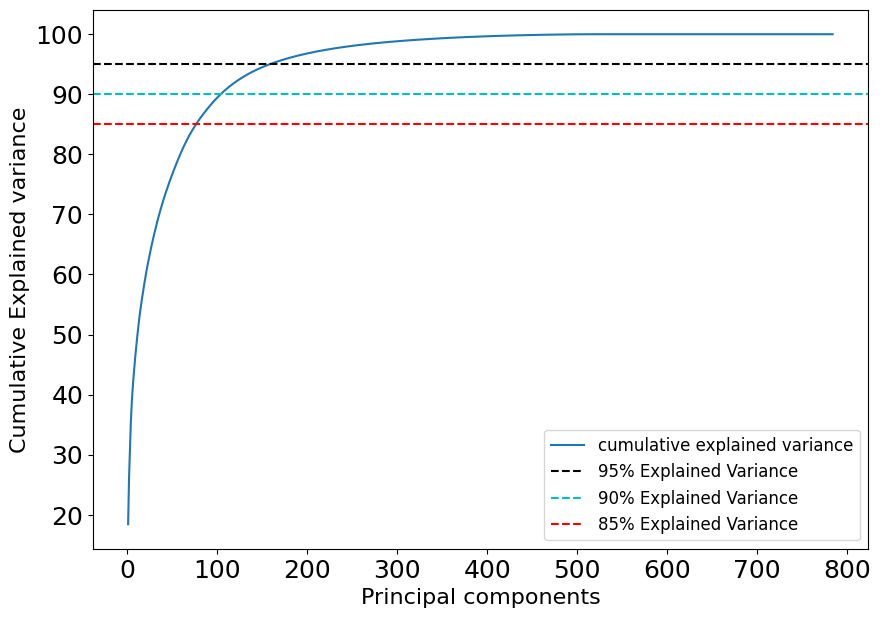

In [10]:
# if n_components is not set, all components are kept (784 in this case)
pca = PCA()

pca.fit(scaledTrainImages)

# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));
ax.tick_params(labelsize = 18)
ax.plot(range(1, 785), cum_var_exp, label='cumulative explained variance')
ax.set_ylabel('Cumulative Explained variance', fontsize = 16)
ax.set_xlabel('Principal components', fontsize = 16)
ax.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
ax.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
ax.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
ax.legend(loc='best', markerscale = 1.0, fontsize = 12)

So that's it, PCA can be used to speed up the fitting of your algorithm.